# Disaster Tweets

> Twitter has become an important communication channel in times of emergency.
> The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).
> 
> But, it’s not always clear whether a person’s words are actually announcing a disaster.

## Prerequisities

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

## Data Investigation

### Idea

We want to start with getting an overview about our dataset:
* Shape
* Datatypes
* Missing Values
* Distributions
* "Dirty" Data

### Some first quick insights

In [ ]:
df = pd.read_csv('data/train.csv', index_col='id')
df.info()

In [ ]:
df.shape

**Which column has the most absolute number of missing values?**
1. `keyword`
2. `location`
3. `text`
4. `target`

In [ ]:
df.isnull().sum()

### Examplary Samples

In [ ]:
with pd.option_context('display.max_colwidth', 400):
    print(df.sample(5))

**Numeric and Categorical Columns**

Get column names of numerical and categorical columns.

In [ ]:
cat_cols = list(df.select_dtypes(include='object').columns)
num_cols = set(df.columns) - set(cat_cols)
print(cat_cols)
print(list(num_cols))

### Pandas Profiling

**Exercise 1**
Pandas Profiling helps you a lot with data exploration. Take some time with you colleagues to take a look
at the generated reported and gather insight about the data set.

In [ ]:
profile = ProfileReport(df, title="Disaster Tweets Dataset - Uncleaned", explorative=True)
profile.to_file("report_uncleaned.html")
with pd.option_context('display.max_colwidth', 400):
    profile.to_widgets()

### Distribution of our target
**Exercise 2** Check the taget distribution and make an appropriately
labeled pie plot of the target. Also, display (print) a few tweets which
correspond to a distaster and a few which correspond to no disaster.

In [ ]:
# Your Solution Here

### Closer look at the "text" column by target value

In [ ]:
# Your Solution Here

**Why is it important that the target is equally distributed?**

- for unbalanced datasets, the prediction of the model will most likely be biased towards the majority class. This is due to the fact that the model tries to minimize the training error on the entire training dataset. Each sample is equally important here. If the training data is unbalanced however, the majority class will come into play much more often.
- one easily can be fooled looking at the accuracy metric only when evaluating the performance of our model: Think of a dataset about a very rare disease (0.001%), meaning we have 1 sample for the "disease" case, and 100000 - 1 samples for the "non-disease" case. Given we have a naive model that always predicts a "non-disease" target, this model will have a accuracy of 99.999%. Nonetheless, the model fails to correctly classify the "disease" cases (which to be fair is what our main intention ist). Therefore, we need to make sure to use other metrics like recall, precision, f1 when evaluating the performance on unbalanced datasets.

Read more at https://medium.com/strands-tech-corner/unbalanced-datasets-what-to-do-144e0552d9cd and https://twitter.com/svpino/status/1357302018428256258?lang=en for more information.

### Word Clouds

**Exercise 3**: Create a table with unique entries in the `keyword` column and their number counts for the case of  Disaster and no Disaster.

In [ ]:
# Your Solution Here

**Question**
Does above result directly indicate that `derailment` is certain to be a good hint for a disaster?
1. Yes
2. No

No, `derailment` is not certain to be a good hint for a disaster since we are only looking at absolute number counts. One should also take into account the fraction that the keyword `derailment` was of a `disaster` target.

**Creating a Wordcloud for the keywords associated with the label Disaster and no Disaster**

In [ ]:
from wordcloud import WordCloud

wordcloud_nondisaster = WordCloud(max_font_size=40).generate_from_frequencies(keyword_count_nondisaster)
wordcloud_disaster = WordCloud(max_font_size=40).generate_from_frequencies(keyword_count_disaster)

plt.figure(figsize=(20, 20), dpi=100)
plt.subplot(1,2,1)
plt.imshow(wordcloud_nondisaster)
plt.title('No Disaster')
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(wordcloud_disaster)
plt.title('Disaster')
plt.axis("off")
plt.show()

### Target mean by Keyword

**Exercise 4** Display an ordered list in the form of a plot of each keyword and the corresponding mean of target values associated with that keyword. 

Hints:
- Use the groupby method of Pandas
- Use barplot from Seaborn to display the results.

In [ ]:
# Your Solution Here

### Number of Target Values by Keyword

**Exercise 5** Display for each keyword the number of times the target is a disaster or no disaster.

Hint:
- You can use countplot from Seaborn

In [ ]:
# Your Solution Here

### Location influence

**Discussion Point**

Do you think that we should use the `location` column as a feature for our model?



## Data Cleaning

Now that we looked into our data, we need to clean it up next.

In [ ]:
df = pd.read_csv('data/train.csv', index_col='id')

**Exercise 6** Tasks:
- Drop the location column
- Check missing values and suggest a way to deal with them
- Remove non alphanumeric entries from Keyword. Hint: you might find the "str.isalpha()" method useful and use regular expressions.
- Remove duplicate whitespace characters

In [ ]:
# Your Solution Here

## Feature Engineering

**Exercise 7** Find ways to add the following features to the dataset:
- Feature to specify the number of words included in the text column
- Feature to specify the number of characters in the text column
- Feature to specify the average length of each word in the text column
- Feature to specify the number of hashtags in the text column. Hint: use "str.count()"
- Feature to specify the number of mentions "@" in the text column. Hint: use "str.count()"
- Feature to specify the number of characters which are non alphanumeric in the text column. Hint: use "str.count()"


### Look again at Pandas Profiling Output

In [ ]:
profile = ProfileReport(df, title="Disaster Tweets Dataset - Cleaned", explorative=True)
profile.to_file("report_cleaned.html")
profile.to_widgets()

### Pairplot

In [ ]:
cols = ['text_num_words', 'text_num_hashtag', 'text_num_mentions', 'target']
sns.pairplot(df[cols])
plt.show()

### Comparing distributions for target

In [ ]:
import math
cols = [c for c in df.columns if 'text_' in c]
plt.figure(figsize=(10, 15), dpi=100)
layout_cols = 4
layout_rows = len(cols)
for i, c in enumerate(cols):
    plt.subplot(layout_rows, layout_cols, layout_cols*i+1)
    sns.histplot(data=df, x=c, hue='target', stat='probability', common_norm=False)
    plt.grid()
    plt.subplot(layout_rows, layout_cols, layout_cols*i+2)
    sns.histplot(data=df, x=c, hue='target', stat='probability', cumulative=True, common_norm=False)
    plt.grid()
    plt.subplot(layout_rows, layout_cols, layout_cols*i+3)
    sns.boxplot(data=df, y=c, x='target')
    plt.grid()
    plt.subplot(layout_rows, layout_cols, layout_cols*i+4)
    sns.violinplot(data=df, y=c, x='target')
    plt.grid()
plt.tight_layout()

**Question**

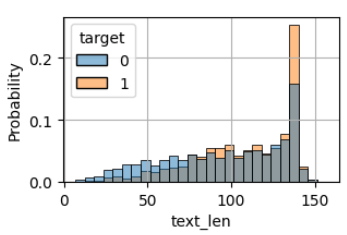

For the `text_len` distribution, which first preporcessing step would make the most sense?
1. Normalize the data using a Gaussian Distribution --> `StandardScaler`
2. Rescale the values to be between 0 and 1 using min and max values --> `MinMaxScaler`
3. Apply a log transformation --> `PowerTransformer`
4. Remove outliers cutting off everything above and below 3 standard deviations

Answer 3 or generally 4 is correct. Applying a `StandardScaler` as well as a `MinMaxScaler` works badly for skewed distributions. Additionally we do not have any severe outliers in this concrete example. Overall one should be aware of treating outliers as a first step before any normalization though.


### Bag Of Words

**Open Question**

What are the possible downsides of a bag of words model?
Please unmute yourself and share your thoughts.

- high dimensional, sparse sentence vectors
- No contextual information considered, just the notion of the presence of a word without any sense of place inside the sentence. Take the following two examples which would result in the same output vectors: "I like cats and hate dogs" and "I hate cats and like dogs". Clearly they are quite the opposite.

Since we are using a bag of words model, let's simply add the keyword to the text.

In [ ]:
df['key_text'] = df['keyword'] + ' ' + df['text']

In [ ]:
df['key_text']

Let's split the data into train and val.

In [ ]:
from sklearn.model_selection import train_test_split
X = df['key_text']
y = df['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
def my_tokenizer(sentence):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and token.lemma_.isalpha()]
    return lemmas

**Question**

What will be the result of the following cell?
1. `['people', 'be', 'whitnesse', 'wildfire', 'see', 'wwwevacuation', 'and']`
2. `['whitnesse', 'wildfire', 'wwwevacuation']`
3. `['people', 'whitnessing', 'wildfires', 'wwwevacuation']`
4. `['people', 'whitnesse', 'wildfire', 'evacuation']`

In [ ]:
s = "13,000People are whitnessing #wildfires see wwwEvacuation and www.google.de"
my_tokenizer(s)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(tokenizer=my_tokenizer, ngram_range=(1,1), max_features=1000)

In [ ]:
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_val_bow = bow_vectorizer.transform(X_val)

In [ ]:
X_train_bow_df = pd.DataFrame(X_train_bow.toarray(), columns=bow_vectorizer.get_feature_names(), index=X_train.index).add_prefix('BOW_')
X_val_bow_df = pd.DataFrame(X_val_bow.toarray(), columns=bow_vectorizer.get_feature_names(), index=X_val.index).add_prefix('BOW_')
X_train_bow_df

In [ ]:
X_train_bow_df.sum().sort_values(ascending=False)

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_bow_df, y_train)

In [ ]:
print(f'Training Accuracy: {classifier.score(X_train_bow_df, y_train):.2f}')
print(f'Validation Accuracy: {classifier.score(X_val_bow_df, y_val):.2f}')

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_val_bow_df, y_val, normalize='true', cmap=plt.cm.Blues)
plt.show()

In [ ]:
from pprint import pprint
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_val, classifier.predict(X_val_bow_df))

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

scores = {
    'TPR': TP / (TP + FN), # recall,
    'FPR': FP / (FP + TN),
    'PPV': TP / (TP + FP), # precision,
    'ACC': (TP + TN) / (TN + FN + TP + FP),
}

pprint(scores)

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_val_bow_df, y_val)
plt.plot(scores['FPR'], scores['TPR'], 'or')
plt.text(scores['FPR'] + 0.05, scores['TPR'] - 0.01, 'current configuration, threshold of 0.5')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_val, classifier.predict(X_val_bow_df))

### Model Explainability

In [ ]:
s = 'worrying sinkhole'
X_new = bow_vectorizer.transform([s]).toarray()
print(classifier.predict(X_new)[0])
print(classifier.predict_proba(X_new)[0])

In [ ]:
coefficients = pd.DataFrame({"word": list(bow_vectorizer.get_feature_names()), "coeff": classifier.coef_[0]})
coefficients.sort_values(by=['coeff'], ascending=False).head(10)

In [ ]:
coefficients.sort_values(by=['coeff'], ascending=False).tail(10)

### How Logistic Regression Works

In [ ]:
len(classifier.coef_[0])

In [ ]:
classifier.intercept_[0]

In [ ]:
coefficients[coefficients['word'].isin(['worry', 'sinkhole'])]

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + math.e ** -x)

def get_proba(classifier, bow_vectorizer, sentence):
    X_new = bow_vectorizer.transform([sentence]).toarray()[0]
    
    # Not needed for calculation of final prediction value, just to get more insights on the contribution of the single words
    found_words = [i for (i, v) in zip(bow_vectorizer.get_feature_names(), X_new) if v == 1]
    df_coefficients = pd.DataFrame({"word": list(bow_vectorizer.get_feature_names()), "coeff": classifier.coef_[0]})
    print(df_coefficients[df_coefficients['word'].isin(found_words)])
    print(f'bias: {classifier.intercept_[0]}')
    
    logit = np.dot(X_new, classifier.coef_[0]) + classifier.intercept_[0]
    print(f'logit: {logit}')
    print(f'after sigmoid: {sigmoid(logit)}')
    return sigmoid(logit)

In [ ]:
get_proba(classifier, bow_vectorizer, 'worrying sinkhole')